### Markov Chain

A Markov chain or Markov process is a stochastic model describing a sequence of possible events in which the probability of each event depends only on the state attained in the previous event. In a diagram, this will look something like: 

<img src = "markov.png"/>

Hence to generalise this, a state at time $S_n$ will be

$S_n = P^nS_0$

**References**

[Markov Chain and Transition Matrices](https://www.youtube.com/watch?v=1GKtfgwf3ig) | Youtube

### Stationary Distribution of a Markov Chain

The stationary distribution of a Markov chain describes the distribution of Xt after a sufficiently long time that the distribution of Xt does not change any longer. That is 

$ X_1 \rightarrow X_2 \rightarrow X_3 \rightarrow ... \rightarrow X_t \rightarrow X_{t+1} \rightarrow X_{t+2} $

Eventually we will get to values of $X_n$ that follows a static distribution e.g. $X_t ... X_{t+6}$ We then throw away anything before $X_t$ (Also called burn-in values) and take these values to be a simulation to our static distribution

Basically - Is there a vector of starting probabilities such that when we arrive at the distribution, it stays constant/static? If the markov chain arrives at a certain state, it has a tendency to stay in that state. i.e. $P(X_{t+1} = S) = P(X_t = S)$

Where $\pi$ is the vector of starting probabilities and $P$ is the transition matrix

solve $\pi P=\pi$ 

for $\pi$

which is essentially the same as finding the eigenvector for $AX=\lambda X$ 
where the eigenvalue is $\lambda = 1$

**References**\
[Stationary Distribution of a Markov Chain](https://www.youtube.com/watch?v=4sXiCxZDrTU) | Youtube

### Markov Chain Monte Carlo

MCMC Is a collection of different methods and algorithms. But the general idea: 

Solves the issue in *Accept and Reject Sampling* where lets say we sample a value on $g$, and we get to a sample that very closely approximates $f$, we dont use this information for our next sampling, but instead, we draw a fresh random sample from $g$ to approximate $f$. This is not ideal in cases where $f$ has a peak, as shown in the graph in the notebook on *Accept and Reject Sampling*

Bringing it in again, lets say we sample $g$ (the normal dist) and get a point ~0.9. This is very close to our power distribution and is therefore *accepted* (using the accept reject sampling method, which determines this as $\frac {f} {Mg} $). However, we dont use this information in the next sampling and instead draw a fresh sample that doesnt depend on info gained in the last, for example, sampling a point at -2, instead of somewhere near the peak, say 0.7. MCMC aims to solve this issue by bringing in the context of previous sampling stages.

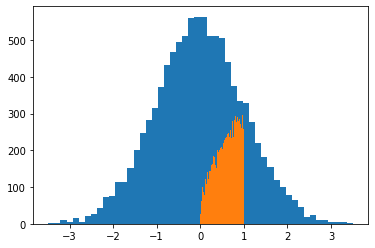

In [1]:
g = np.random.normal(size = (10000,))
f = np.random.power(1.5, size = (10000, ))

nhist = plt.hist(g, bins = 50)
phist = plt.hist(f, bins = 50)
plt.show() 

Our goal will be to arrive at a stationary distribution such that it models our stationary distribution - with probability density function $f$ well enough through a series of markov chain simulations.

There a few MCMC algorithms that will allow us to arrive at the stationary distribution eventually, such as :
1. The Metropolis Hastings Algorithm 
2. Gibbs Sampling

So to sum up, in real world situations where our distributions are irregular, it will be very inefficient to sample our distributions using methods such as AR or IT sampling (for reason stated in the notebooks), so we should use MCMC methods as it allows us to take into consideration previous sampling time steps in order to sample our data. (Make our samples dependent on each other)

#### Metropolis Hastings Algorithm

1. Sample from an easier distribution such that the current sample depends on the previous sample, i.e. $g(x_{t+1}|x_t)$ 
* What this is saying is: Look at our previous sample, center our distribution at $x_t$, then sample the next candidate from that distribution. Then continue this process.

Take note that this is different from the **Metropolis Algorithm**, which the candidate distribution has a *symmetric distribution*, which means there is an equally likely chance that $x_{t+1}$ is sampled from above or below the $x_t$ value. In the **Metropolis-Hastings Algorithm**, the candidate distribution is asymmetric.

2. Accept $x_{t+1}$ with some acceptance probability $A(X_t \rightarrow X_{t+1})$

###  Gibbs sampling 
$\theta_1, \theta_2$